### Model optimization. Regularization, dropout, early stopping
In this task we try to increase accuracy of lenet-5 model and decrease loss.
We know what is overfitting and try to solve it with standard regularization methods - early stopping and Dropout.

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

Lets load lenet-5 model and MNIST Fashion dataset

In [2]:
# Loading dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# divide our train data to train and validation dataset
valid_part = int(len(x_train)*0.8) # 80 persent of data
x_train, x_valid = x_train[:valid_part], x_train[valid_part:]
y_train, y_valid = y_train[:valid_part], y_train[valid_part:]

# scale our data to 0..1 (each pixel)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape input data from (28, 28) to (28, 28, 1) - tensorflow format (tensor)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Resize data to lenet-5 input size (32x32 pixels)
w, h = 32, 32
x_train = tf.image.resize(x_train, (h, w))
x_valid = tf.image.resize(x_valid, (h, w))
x_test = tf.image.resize(x_test, (h, w))

# Reshape labels from 0..9 to vector with size 10 - tensorflow format (tensor)
# This method named One-hot encode.
y_train = tf.one_hot(y_train, 10)
y_valid = tf.one_hot(y_valid, 10)
y_test = tf.one_hot(y_test, 10)

In [3]:
# create new model
model = tf.keras.Sequential()

# Convolutional layer
# Basic parameters for Conv2D layer:
# - filters - number of output filters in the convolution (dimensionality of the output space)
# - kernel_size - size of convolution kernel
# - strides - strides of the convolution along the height and width
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
# Pooling layer
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D())

# Flattern layer - A flatten operation on a tensor reshapes the tensor
# to have the shape that is equal to the number of elements contained in tensor non including the batch dimension
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

Train model and show result

In [4]:
# optimizer, loss and metrics definition
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()
# Compile model with parameters defined above
model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_valid, y_valid))
score = model.evaluate(x_test,  y_test, verbose=0)

print('\n', 'Test accuracy:', score[1], "Test loss:", score[0])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 64us/sample - loss: 1.0432 - categorical_accuracy: 0.6196 - val_loss: 0.6789 - val_categorical_accuracy: 0.7359

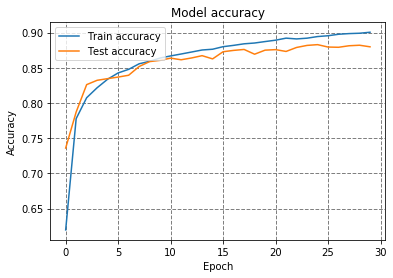

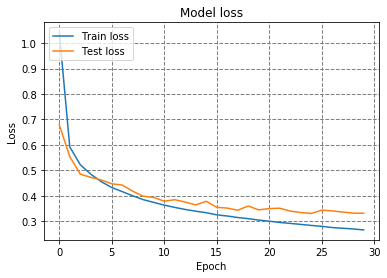

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()



We train our model and get loss ~ 0.35 and accuracy ~ 0.87
So, its not great result. Try up iterations to 90 (3 times) and show results.


Train on 48000 samples, validate on 12000 samples
Epoch 1/90
48000/48000 [==============================] - 2s 46us/sample - loss: 1.0260 - categorical_accuracy: 0.6289 - val_loss: 0.6516 - val_categorical_accuracy: 0.7420

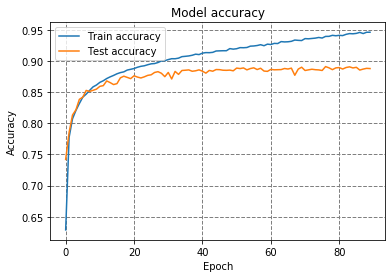

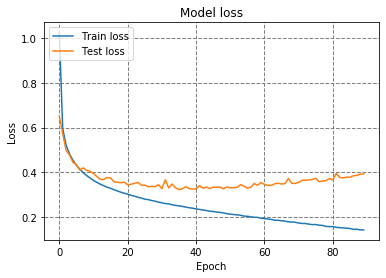

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])
# change number of epochs x3. To 90
history = model.fit(x_train, y_train, batch_size=64, epochs=90, validation_data=(x_valid, y_valid))
score = model.evaluate(x_test,  y_test, verbose=0)
print('\n', 'Test accuracy:', score[1], "Test loss:", score[0])

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()


As we can see train accuracy continued to increase and train loss continued to decrease. But validation accuracy stoped increasing and validation loss started to increase too. This indicates overfitting.
Overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably" - OxfordDictionaries.com. 

For solve overfitting regularization is using.
Standart regularization method is addind Dropout layers in model.

Dropout layer by chance "turn off" specified percent of neurons for each learning iteration.

<img src="images/dropout.png">

"Dropout makes our big network act like a little one by randomly training
little subsections of the network at a time, and little networks don't overfit." - Grokking Deep Learning, p. 154.

Why does it work?
Initial condition of neural networks selected randomly. Its mean every neural network learns differently.
Therefore, they study general patterns and various noise.
After voting, they can reject noise and only common signal stay.
Dropout makes some small neural network from one large.


Lets add Dropout lauers in our model.

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# dropout layer what we added
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# one more dropout layer what we added
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

Manual iterations choosing not best way.
One more way to make model better - stop training before overfitting started.

Tensorflow included [EarlyStoping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) method.
This method helps stop training relying on different training conditions such as "accuracy stop increase" or "loss stop decrease".

Add early stopping as model training parameter when loss start decreasing and set "patience" = 5.
Patience is number of epochs with no improvement after which training will be stopped.

Train on 48000 samples, validate on 12000 samples
Epoch 1/90
48000/48000 [==============================] - 3s 55us/sample - loss: 1.1066 - categorical_accuracy: 0.5892 - val_loss: 0.7009 - val_categorical_accuracy: 0.7437

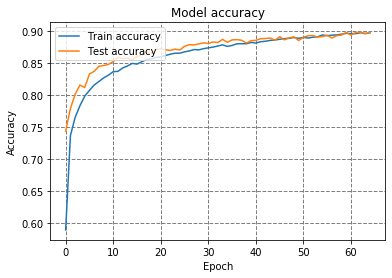

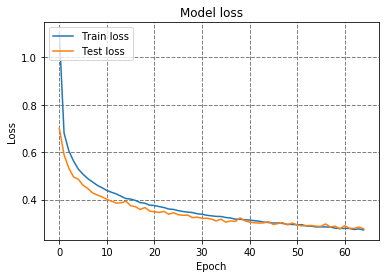

In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=64, epochs=90, callbacks=[early_stopping], validation_data=(x_valid, y_valid))
score = model.evaluate(x_test,  y_test, verbose=0)
print('\n', 'Test accuracy:', score[1], "Test loss:", score[0])

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()


So, my results here (results can be difference because each model train differently):

| 30 iterations without Dropout | 90 iterations without Dropout | 90 (78 with early stopping) iterations with Dropout |
| :--: | :--: | :--: |
| Test accuracy: 0.877 Test loss: 0.34 | Test accuracy: 0.887 Test loss: 0.38 | Test accuracy: 0.893 Test loss: 0.29 |
| <img src="images/30.png"> | <img src="images/90.png"> | <img src="images/90d.png"> |

There are other methods of regularization, such as l1, l2, Lasso(l1-l2) regularization.
Dropout more modern and effective method for CNN and it's recommended to use it first.
